In [2]:
%matplotlib notebook
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [3]:
health_rate = pd.read_csv("new health behaviour rate.csv")

mortality = pd.read_csv("merged.csv")

mortality_rate = mortality.rename(columns={'Geography':'City'})

#mortality_rate.drop(columns=['Unnamed: 0','Age group','population','Number of Mortality','Median Income'])


mortality


,Unnamed: 0,Geography,Age group,population,Number of Mortality,Mortality Rate
0,0,"Abbotsford-Mission, British Columbia",All ages,184021,1252,0.680357
1,1,"Barrie, Ontario",All ages,202264,1426,0.705019
2,2,"Brantford, Ontario",All ages,144109,1339,0.929158
3,3,"Calgary, Alberta",All ages,1432169,6655,0.464680
4,4,"Edmonton, Alberta",All ages,1358345,8173,0.601688
5,5,"Greater Sudbury, Ontario",All ages,165261,1698,1.027466
6,6,"Guelph, Ontario",All ages,153290,1077,0.702590
7,7,"Halifax, Nova Scotia",All ages,416824,3136,0.752356
8,8,"Hamilton, Ontario",All ages,769853,6725,0.873543
9,9,"Kelowna, British Columbia",All ages,195305,1717,0.879138


In [4]:
mortality_health = pd.merge(mortality_rate,health_rate, on='City')
mortality_health = mortality_health.drop(columns=['Number of Mortality','Age group','population','Unnamed: 0'])
mortality_health






,City,Mortality Rate,"Body mass index, adjusted self-reported, adult (18 years and over), obese","Body mass index, adjusted self-reported, adult (18 years and over), overweight",Contact with a medical doctor in the past 12 months,"Current smoker, daily or occasional",Has a regular healthcare provider,Heavy drinking,"Life satisfaction, satisfied or very satisfied",Mood disorder,"Perceived health, fair or poor","Perceived life stress, most days quite a bit or extremely stressful","Perceived mental health, fair or poor","Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
0,"Abbotsford-Mission, British Columbia",0.680357,23.747290,23.747290,62.547209,12.770282,67.166247,13.422381,75.806566,9.727151,7.933877,18.965227,5.868895,48.744437
1,"Barrie, Ontario",0.705019,21.457106,21.704307,56.361982,16.068109,72.479532,16.216430,70.056955,11.124075,11.025195,22.149270,6.625005,43.655816
2,"Brantford, Ontario",0.929158,17.972507,24.564739,56.207454,17.625547,70.085838,17.070412,72.028812,9.090341,9.992436,14.086559,5.551353,41.704543
3,"Calgary, Alberta",0.464680,18.314878,28.858326,63.770407,11.709512,70.955313,15.235632,78.314780,6.528559,7.589886,18.517368,5.753511,47.648008
4,"Edmonton, Alberta",0.601688,19.509035,28.998524,62.038731,16.306608,67.192061,15.761828,77.601787,7.869871,8.429375,17.764265,5.447806,44.981209
5,"Greater Sudbury, Ontario",1.027466,23.841076,25.353834,55.487986,19.302800,68.860772,17.729531,74.125172,8.955531,13.130745,17.487489,8.350428,41.812648
6,"Guelph, Ontario",0.702590,19.570748,26.550982,60.147433,12.590515,77.304456,12.394807,72.477004,11.024855,9.459195,21.527823,6.523583,46.774088
7,"Halifax, Nova Scotia",0.752356,22.839376,27.157745,67.318581,14.754429,75.691419,20.560236,78.642305,8.804675,9.164539,17.225496,6.621500,49.493311
8,"Hamilton, Ontario",0.873543,19.211460,28.200189,60.868763,15.327602,80.249087,16.821393,76.248323,9.079655,9.066666,18.315185,5.728366,47.944218
9,"Kelowna, British Columbia",0.879138,16.179821,27.649062,65.487315,13.210107,67.586595,16.999053,74.857275,9.113950,7.270679,15.206984,4.710581,48.846676


<IPython.core.display.Javascript object>


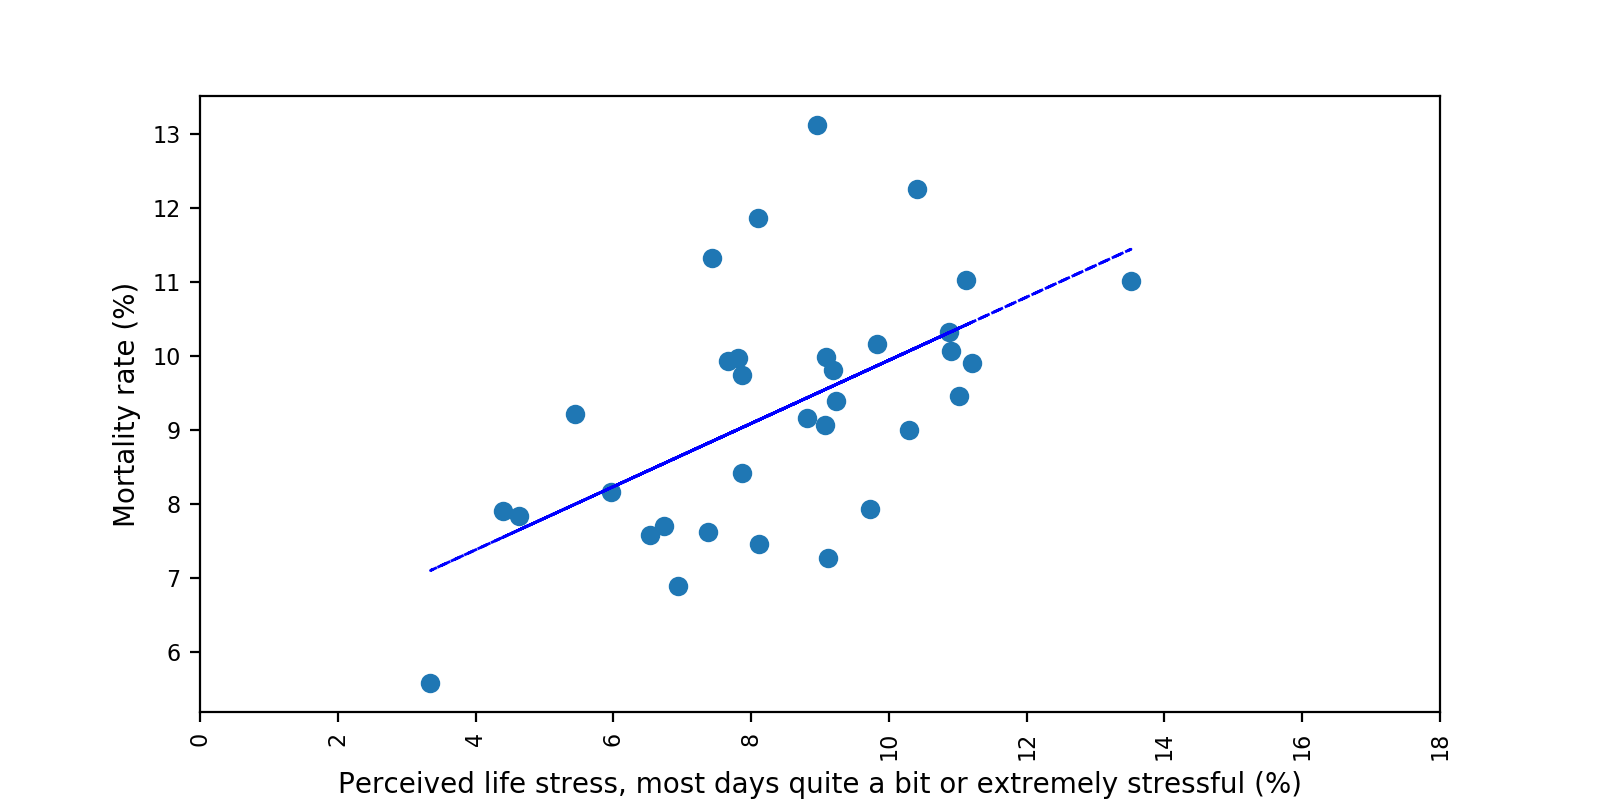

In [11]:
x = mortality_health["Mood disorder"]
y = mortality_health["Perceived health, fair or poor"]


# linear regression with Mortality Rate Vs. Heavy Drinking
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
lof = m_slope*x + m_int

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x,y)
ax.plot(x,lof, "b--", linewidth=1)
ax.set_xticks(np.arange(0,20,2))
ax.set_ylabel("Mortality rate (%)")
ax.set_xlabel("Perceived life stress, most days quite a bit or extremely stressful (%)")
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8,rotation="vertical");